In [1]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [2]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('Cleaned-P&P data.csv')

blanks = []  # start with an empty list`

# for i,c,d,inc,sd in df1.itertuples():  # iterate over the DataFrame
#         if c == 'O' or c=='E':         # test 'review' for whitespace
#             blanks.append(i)     # add matching index numbers to the list
df1.drop(blanks, inplace=True)
df1["desc"] = df1["short_des"] + '. ' + df1["desc"]
df1.reset_index(drop=True,inplace=True)


In [3]:

df2 = pd.read_csv('Cleaned-P&P data.csv')
blanks2 = []  # start with an empty list`

# for i,c,d,inc,sd in df2.itertuples():  # iterate over the DataFrame
#         if c == 'O' or c=='E':         # test 'review' for whitespace
#             blanks2.append(i)     # add matching index numbers to the list
df2.drop(blanks2, inplace=True)
df2.reset_index(drop=True,inplace=True)

dataset = pd.concat([df1, df2], ignore_index=True)

In [4]:
df3 = pd.read_csv('Cleaned-P&P data.csv')

blanks = []  # start with an empty list`

for i,c,d,inc,sd in df1.itertuples():  # iterate over the DataFrame
        if c == 'O' or c=='E':         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
df3.drop(blanks, inplace=True)
df3["desc"] = df1["short_des"] + '. ' + df1["desc"]
df3.reset_index(drop=True,inplace=True)


df4 = pd.read_csv('Cleaned-P&P data.csv')
blanks2 = []  # start with an empty list`

for i,c,d,inc,sd in df2.itertuples():  # iterate over the DataFrame
        if c == 'O' or c=='E':         # test 'review' for whitespace
            blanks2.append(i)     # add matching index numbers to the list
df4.drop(blanks2, inplace=True)
df4.reset_index(drop=True,inplace=True)

dataset2 = pd.concat([df3, df4], ignore_index=True)


#### Dataset1

In [5]:
# Cleaning the texts
import re
corpus = []
all_words = []
max_len=0
for i in range(0, 504):

    review = re.sub('\w\d{7}', ' ', dataset['desc'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    
    review = nlp(review)
    review = [word.text for word in review]
   # for word.text in review:
        
    all_words.append(review) 
    if len(review) > max_len:
        max_len = len(review)
    ds = ' '.join(review)
#    for word2vec we want an array of vectors
    corpus.append(ds)
    

dpf = pd.read_csv('Del-Pass.csv')



keys_list = dpf['kpattern'].tolist()
regex = re.compile(r'(' + '|'.join(keys_list) + r')') 

cus_list = ['remove','removed','cancelled', 'cancel' ,'deleted']
regey = re.compile(r'(' + '|'.join(cus_list) + r')') 

import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
additional =["thank you","please","hello","hi","advise","hin't","st","nd","rd","th","thank","good afternoon","good morning","good evening"]
stopwords = stopwords + additional
remov=[]
for ele in stopwords:
    matches = re.findall("n't",ele)
    matches2 = re.findall("'nt",ele)
    if len(matches)>0 or len(matches2)>0:
        remov.append(ele)
stopwords = [word for word in stopwords if word not in remov]

In [6]:
lemmatized_list=[]
for snt in corpus:
#    print(snt)
    tokens = nlp(snt)
#    for token in tokenized:
    filtered_sentence = [w.text for w in tokens if not w.text in stopwords]
#                 lemm = token.lemma_ for token.text in token
#             lemmatized_list.append(lemm)
    stri = ' '.join(filtered_sentence)
    lemmatized_list.append(stri)

In [7]:
cldict = {'P':1 , 'R':1, 'E':-1,'O':-1}
dataset['Class Label'] = dataset['class'].map(cldict)
label_series = pd.Series(dataset['Class Label'])

#### Dataset 2

In [8]:
# Cleaning the texts
import re
corpus2 = []
all_words = []
max_len=0
for i in range(0, 490):

    review = re.sub('\w\d{7}', ' ', dataset2['desc'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    
    review = nlp(review)
    review = [word.text for word in review]
   # for word.text in review:
        
    all_words.append(review) 
    if len(review) > max_len:
        max_len = len(review)
    ds = ' '.join(review)
#    for word2vec we want an array of vectors
    corpus2.append(ds)
    

In [9]:
lemmatized_list2=[]
for snt in corpus2:
#    print(snt)
    tokens = nlp(snt)
#    for token in tokenized:
    filtered_sentence = [w.text for w in tokens if not w.text in stopwords]
#                 lemm = token.lemma_ for token.text in token
#             lemmatized_list.append(lemm)
    stri = ' '.join(filtered_sentence)
    lemmatized_list2.append(stri)

In [10]:
cldict = {'P':1 , 'R':1, 'E':-1,'O':-1}
dataset2['Class Label'] = dataset2['class'].map(cldict)
label_series2 = pd.Series(dataset2['Class Label'])

In [11]:
from keras.utils import to_categorical

class_label = np.array(label_series)
y = class_label
y.shape

Using TensorFlow backend.


(504,)

In [12]:
print(max_len)

123


In [13]:
all_words = [j for sub in all_words for j in sub] 

In [14]:
# unique_words = set(all_words)
# print(len(unique_words))
# vocab_length = len(unique_words) + 10
# vocab_length

In [15]:
ref_corpus=[]
for text in lemmatized_list:           
            trans = regex.sub(lambda m: m.group().replace(m.group(),"del-pass "),text)
            trans_ref = regey.sub(lambda n: n.group().replace(n.group(),"delete "),trans)
             
            ref_corpus.append(trans_ref)


In [16]:
ref_corpus2=[]
for text in lemmatized_list2:           
            trans = regex.sub(lambda m: m.group().replace(m.group(),"del-pass "),text)
            trans_ref = regey.sub(lambda n: n.group().replace(n.group(),"delete "),trans)
             
            ref_corpus2.append(trans_ref)


In [17]:
X = ref_corpus
len(X)

504

In [18]:
# ind = []
# for i in range(0,403):
#     if y_train[i] == -1:
#   #      y_train.pop[i]
#          ind.append(i)
# X_train = np.array(X_train)
# trainy = np.delete(y_train, ind)
# trainx = np.delete(X_train, ind)
    

In [19]:
datadf = pd.DataFrame()

In [20]:
dataset['Clean desc'] = X

In [21]:
datadf = dataset[dataset['Clean desc'] != '']

In [22]:
datadf2 = datadf.head()

#### PLot the data

### Transform into word vecs

In [23]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.parsing.preprocessing import preprocess_string
from sklearn.base import BaseEstimator
from sklearn import utils as skl_utils
from tqdm import tqdm

import multiprocessing
import numpy as np

class Doc2VecTransformer(BaseEstimator):

    def __init__(self, vector_size=100, learning_rate=0.02, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self._model = None
        self.vector_size = vector_size
        self.workers = multiprocessing.cpu_count() - 1

    def fit(self, df_x, df_y=None):
        tagged_x = [TaggedDocument(str(dataset2['Clean desc']).split(), [index]) for index, dataset2 in df_x.iterrows()]
        model = Doc2Vec(documents=tagged_x, vector_size=self.vector_size, workers=self.workers)

        for epoch in range(self.epochs):
            model.train(skl_utils.shuffle([x for x in tqdm(tagged_x)]), total_examples=len(tagged_x), epochs=1)
            model.alpha -= self.learning_rate
            model.min_alpha = model.alpha

        self._model = model
        return self

    def transform(self, df_x):
        return np.asmatrix(np.array([self._model.infer_vector(str(dataset2['Clean desc']).split()) for index, dataset2 in df_x.iterrows()]))
                                 
                    


In [24]:
datadf3 = datadf2.append({'Clean desc' : 'customer charged del-pass customer paid pounds bought del-pass still charged delivery charges' },ignore_index=True)

In [25]:
test_vec_tr = Doc2VecTransformer(vector_size=300)
test_vec_tr.fit(datadf3)
test_vec = test_vec_tr.transform(datadf3)

100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 5997.57it/s]


In [26]:
doc2vec_tr = Doc2VecTransformer(vector_size=300)
doc2vec_tr.fit(datadf)
doc2vec_vectors = doc2vec_tr.transform(datadf)

100%|████████████████████████████████████████████████████████████████████████████| 504/504 [00:00<00:00, 504638.15it/s]


#### Plot data

In [27]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']

# Plot
import matplotlib.pyplot as plt
plt.scatter(x_pca['PC1'], x_pca['PC2'], c=datadf['Class Label'])
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

ValueError: could not convert string to float: 'good afternoon customer charged delivery purchasing del-pass  see needs activating advance rebecca connolly proactive notification team'

#### TFIDF

In [57]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(sublinear_tf=True)
# features = tfidf.fit_transform(datadf['Clean desc']).toarray()
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(decode_error="replace")
vec_train = vectorizer.fit_transform(np.array(datadf['Clean desc'])).toarray()

In [58]:
import pickle
pickle.dump(tfidf.vocabulary_,open("NN 1 tfidf vocab.pkl","wb"))

In [65]:
vec_train[6]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

### Hashing vectorizer

In [63]:
# from sklearn.feature_extraction.text import HashingVectorizer
# vectorizer = HashingVectorizer(n_features=20)

# features = vectorizer.fit_transform(datadf['Clean desc']).toarray()

In [29]:
datadf['Clean desc'][7]

'del-pass needs removing staff account supra dba req del-pass delete d staff account thanks'

In [63]:
features[8]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.38574698, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.24154198, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Create an Auto-Encoder using pyod

In [35]:
import pyod
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder

In [36]:
datadf['Clean desc'][0]

'good afternoon customer charged delivery purchasing del-pass  see needs activating advance rebecca connolly proactive notification team'

In [66]:
from sklearn.model_selection import train_test_split
#X = doc2vec_vectors
#X = [nlp(text).vector for text in datadf['Clean desc']]
X = vec_train
y = datadf['Class Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)


#### Model1

In [67]:
clf1 = AutoEncoder(hidden_neurons =[644, 161, 161, 644])
clf1.fit(X_train)

C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 644)               415380    
_________________________________________________________________
dropout_23 (Dropout)         (None, 644)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 644)               415380    
_________________________________________________________________
dropout_24 (Dropout)         (None, 644)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 644)               415380    
_________________________________________________________________
dropout_25 (Dropout)         (None, 644)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 161)               103845    
__________

362/362 [==============================] - 0s 1ms/step - loss: 6.6269 - val_loss: 9994.5476
Epoch 59/100
362/362 [==============================] - 0s 1ms/step - loss: 6.5441 - val_loss: 10005.8059
Epoch 60/100
362/362 [==============================] - 0s 1ms/step - loss: 6.4362 - val_loss: 10015.9372
Epoch 61/100
362/362 [==============================] - 0s 1ms/step - loss: 6.4051 - val_loss: 10026.1612
Epoch 62/100
362/362 [==============================] - 0s 1ms/step - loss: 6.3469 - val_loss: 10035.2441
Epoch 63/100
362/362 [==============================] - 0s 1ms/step - loss: 6.2958 - val_loss: 10044.6560
Epoch 64/100
362/362 [==============================] - 0s 1ms/step - loss: 6.1822 - val_loss: 10053.8654
Epoch 65/100
362/362 [==============================] - 0s 1ms/step - loss: 6.1623 - val_loss: 10063.0806
Epoch 66/100
362/362 [==============================] - 0s 1ms/step - loss: 6.0767 - val_loss: 10071.3551
Epoch 67/100
362/362 [==============================] - 0s 1

C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[644, 161, 161, 644],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x00000113FF3CD168>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


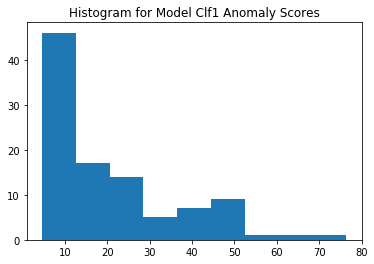

In [68]:
# Get the outlier scores for the train data
y_train_scores = clf1.decision_scores_  

# Predict the anomaly scores
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)

# Plot it!
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

#### Model 2

C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 644)               415380    
_________________________________________________________________
dropout_29 (Dropout)         (None, 644)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 644)               415380    
_________________________________________________________________
dropout_30 (Dropout)         (None, 644)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 644)               415380    
_________________________________________________________________
dropout_31 (Dropout)         (None, 644)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 270)               174150    
__________

362/362 [==============================] - 0s 1ms/step - loss: 7.0248 - val_loss: 2980.7117
Epoch 57/100
362/362 [==============================] - 0s 1ms/step - loss: 6.9386 - val_loss: 2986.8267
Epoch 58/100
362/362 [==============================] - 0s 1ms/step - loss: 6.8513 - val_loss: 2992.4176
Epoch 59/100
362/362 [==============================] - 1s 1ms/step - loss: 6.7564 - val_loss: 2997.4946
Epoch 60/100
362/362 [==============================] - 0s 1ms/step - loss: 6.7066 - val_loss: 3002.6747
Epoch 61/100
362/362 [==============================] - 0s 1ms/step - loss: 6.6253 - val_loss: 3007.9085
Epoch 62/100
362/362 [==============================] - 0s 1ms/step - loss: 6.5390 - val_loss: 3012.2848
Epoch 63/100
362/362 [==============================] - 0s 1ms/step - loss: 6.4898 - val_loss: 3016.6515
Epoch 64/100
362/362 [==============================] - 0s 1ms/step - loss: 6.4313 - val_loss: 3020.9218
Epoch 65/100
362/362 [==============================] - 0s 1ms/step 

C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


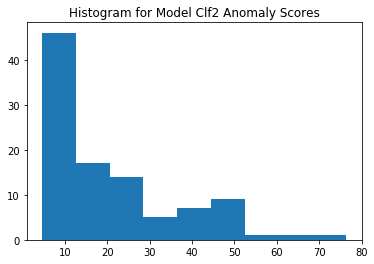

In [69]:
clf2 = AutoEncoder(hidden_neurons =[644, 270,64, 270, 644])
clf2.fit(X_train)

# Predict the anomaly scores
y_test_scores = clf2.decision_function(X_test)  
y_test_scores = pd.Series(y_test_scores)

# Plot the histogram
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf2 Anomaly Scores")
plt.show()

#### Model 3

C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 644)               415380    
_________________________________________________________________
dropout_36 (Dropout)         (None, 644)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 644)               415380    
_________________________________________________________________
dropout_37 (Dropout)         (None, 644)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 1288)              830760    
_________________________________________________________________
dropout_38 (Dropout)         (None, 1288)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 405)               522045    
__________

362/362 [==============================] - 1s 3ms/step - loss: 5.4345 - val_loss: 284.7484
Epoch 52/100
362/362 [==============================] - 1s 4ms/step - loss: 5.3727 - val_loss: 285.4988
Epoch 53/100
362/362 [==============================] - 1s 3ms/step - loss: 5.2551 - val_loss: 286.2253
Epoch 54/100
362/362 [==============================] - 1s 3ms/step - loss: 5.2182 - val_loss: 286.9899
Epoch 55/100
362/362 [==============================] - 2s 5ms/step - loss: 5.1264 - val_loss: 287.6976
Epoch 56/100
362/362 [==============================] - 1s 3ms/step - loss: 5.0406 - val_loss: 288.3591
Epoch 57/100
362/362 [==============================] - 1s 2ms/step - loss: 5.0065 - val_loss: 288.9890
Epoch 58/100
362/362 [==============================] - 1s 2ms/step - loss: 4.9277 - val_loss: 289.5728
Epoch 59/100
362/362 [==============================] - 1s 3ms/step - loss: 4.8444 - val_loss: 290.1686
Epoch 60/100
362/362 [==============================] - 1s 2ms/step - loss: 4

C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AVNEET\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


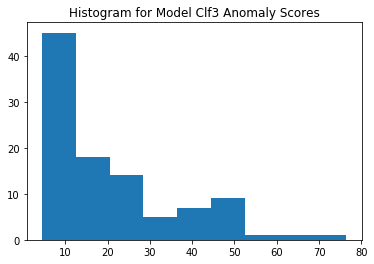

In [70]:
clf3 = AutoEncoder(hidden_neurons =[1288,405, 270,64, 270,405,1288])
clf3.fit(X_train)

# Predict the anomaly scores
y_test_scores = clf3.decision_function(X_test)  
y_test_scores = pd.Series(y_test_scores)

# Plot the histogram
import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  
plt.title("Histogram for Model Clf3 Anomaly Scores")
plt.show()

### tesst scores

In [56]:
test_features = tfidf.fit_transform(datadf['Clean desc']).toarray()
test_scores = clf1.decision_function(test_features)  # outlier scores
test_scores = pd.Series(test_scores)
# Predict the anomaly scores
test_vec_scores = clf1.decision_function(test_vec[5])  # outlier scores
test_vec_scores = pd.Series(test_vec_scores)
test_vec_scores

ValueError: operands could not be broadcast together with shapes (1,300) (644,) (1,300) 

In [60]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(sublinear_tf=True)
# test_features = tfidf.fit_transform(datadf['Clean desc']).toarray()
# test_scores = clf1.decision_function(test_features)  # outlier scores
# test_scores = pd.Series(test_scores)
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
loaded_vec = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("NN 1 tfidf vocab.pkl", "rb")))


In [73]:
tfidf_trans = transformer.fit_transform(loaded_vec.fit_transform(np.array(["stock needs cleaning warehouse display sun orbit"]))).toarray()
test_scores = clf1.decision_function(tfidf_trans)  # outlier scores
test_scores

array([5.48363601])

In [92]:
df_test = pd.DataFrame(X_test)
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<45, 0, 1)
df_test['cluster'].value_counts()

df_test.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,635,636,637,638,639,640,641,642,643,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.064562,0.0,0.0,0.125684,0.0,0.003041,0.042951,0.0,...,0.003199,0.005843,0.000000,0.0,0.020632,0.0,0.0,0.009219,0.0,19.357361
1,0.0,0.0,0.066855,0.0,0.0,0.019458,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.042932,0.0,0.017498,0.0,0.0,0.000000,0.0,57.858157


numpy.matrixlib.defmatrix.matrix

#### Using spacy to create word vecs

In [30]:
#doc2vec_vectors  = [nlp(text).vector for text in X]

### Train Auto-Encoder Neural Network

In [31]:
from sklearn.neural_network import MLPRegressor

auto_encoder = MLPRegressor(hidden_layer_sizes=(
                                                 300,
                                                 150, 
                                                 300,
                                               ))
auto_encoder.fit(doc2vec_vectors, doc2vec_vectors)
predicted_vectors = auto_encoder.predict(doc2vec_vectors)

In [32]:
#list1 = ['Please remove the delivery pass from staff accounts']
auto_encoder.predict(doc2vec_tr.transform(datadf3))

array([[-3.64925480e-04,  9.11887041e-04,  7.54864959e-04, ...,
         1.88911629e-03,  1.98054896e-03, -1.76280818e-03],
       [-5.02791335e-04,  9.75249626e-04,  9.02661809e-04, ...,
         1.36411889e-03,  1.72334403e-03, -1.36646350e-03],
       [ 2.85642308e-02,  1.99798376e-01,  1.85213712e-01, ...,
         2.85561056e-01, -1.01652653e-02, -1.32842493e-01],
       [-5.50034193e-04,  1.76055947e-03,  4.43019719e-04, ...,
         1.13555165e-03,  2.23316355e-03, -1.86009521e-03],
       [ 3.95937437e-04,  8.35681411e-04,  1.04298269e-03, ...,
         1.30631969e-03,  1.70046988e-03, -1.64892567e-03],
       [-1.74268150e-04,  1.20889498e-03,  7.61817256e-04, ...,
         1.36326260e-03,  1.68095428e-03, -1.45375085e-03]])

In [33]:
auto_encoder.score(predicted_vectors, doc2vec_vectors)

0.968285928908734

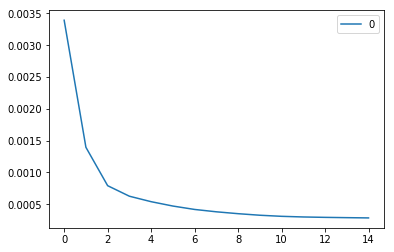

In [34]:
pd.DataFrame(auto_encoder.loss_curve_).plot()

In [35]:
from scipy.spatial.distance import cosine

def key_consine_similarity(tupple):
    return tupple[1]

def get_computed_similarities(vectors, predicted_vectors, reverse=False):
    data_size = len(datadf)
    cosine_similarities = []
    for i in range(data_size):
        cosine_sim_val = (1 - cosine(vectors[i], predicted_vectors[i]))
        cosine_similarities.append((i, cosine_sim_val))

    return sorted(cosine_similarities, key=key_consine_similarity, reverse=False)

def display_top_n(sorted_cosine_similarities, n=400):
    for i in range(n):
        index, consine_sim_val = sorted_cosine_similarities[i]
        print('Movie Title: ', datadf.iloc[index, 5])  
        print('Cosine Sim Val :', consine_sim_val)
        print('---------------------------------')

In [36]:
print('Top 5 unique movies')
sorted_cosine_similarities = get_computed_similarities(vectors=doc2vec_vectors, predicted_vectors=predicted_vectors)
display_top_n(sorted_cosine_similarities=sorted_cosine_similarities)

Top 5 unique movies
Movie Title:  short description del-pass  purchased but was pound pens for standard delivery charge she wants to get it activated the account is in mainframe affected people contact number with country code customer number website simply be verified email address in case of password issue kimmentha hotmail com
Cosine Sim Val : -0.13895259238224789
---------------------------------
Movie Title:  please can you delete  the annual del-pass  on this account thank you
Cosine Sim Val : -0.13352881627153246
---------------------------------
Movie Title:  being charged for delivery customer number customer alan wlkin website jd williams issue he has paid pounds pens on th january for free delivery and is still being charged for delivery ext
Cosine Sim Val : -0.12860875072461986
---------------------------------
Movie Title:  the payment is made by customer but no order showing on jacamo s team side short description the payment is made by customer butno order showing on jac

Cosine Sim Val : -0.010486005377120966
---------------------------------
Movie Title:  customer request annual del-pass delete lation please can you delete  the annual del-pass  on account thanks
Cosine Sim Val : -0.01044609960741516
---------------------------------
Movie Title:  annual del-pass not active on account please can you activate annual del-pass on account purchased customer still being charged for delivery thanks
Cosine Sim Val : -0.010416562069773372
---------------------------------
Movie Title:  short description customer got delivery offer of pounds pence for free delivery but she is sill charged for delivery customer i d customer name susan whitaker website name simply be contact number
Cosine Sim Val : -0.010172945730162253
---------------------------------
Movie Title:  please delete  del-pass  please can you delete  the del-pass from staff account
Cosine Sim Val : -0.009665619545287996
---------------------------------
Movie Title:  fault zoe called in to report th

In [37]:
datadf

,class,desc,inc_num,short_des,Class Label,Clean desc
0,P,"y2684992. good afternoon,\r\n\r\nthis customer...",INC0809260,y2684992,1,good afternoon this customer is being charged ...
1,R,delivery pass needs removing on staff accounts...,INC0808628,delivery pass needs removing on staff accounts...,1,del-pass needs removing on staff accounts orde...
2,O,g7121564. please set (acustrss ) to 1 so accou...,INC0807303,g7121564,-1,please set acustrss to so account holder can r...
3,R,delivery pass needs removing on staff accounts...,INC0807253,delivery pass needs removing on staff accounts...,1,del-pass needs removing on staff accounts orde...
4,P,customer being charged for delivery. customer:...,INC0806836,customer being charged for delivery,1,customer being charged for delivery customer w...
5,P,website/web shop issues. short description:tam...,INC0805994,website/web shop issues,1,website web shop issues short description tama...
6,R,delivery passes. hi\r\n\r\nplease can the deli...,INC0805875,delivery passes,1,del-pass hi please can the del-pass be delet...
7,R,delivery pass needs removing on staff account ...,INC0803134,delivery pass needs removing on staff account ...,1,del-pass needs removing on staff account supra...
8,R,delivery pass needs removing on staff accounts...,INC0798911,delivery pass needs removing on staff accounts...,1,del-pass needs removing on staff accounts orde...
9,P,customer being charged for delivery. issue: cu...,INC0793541,customer being charged for delivery,1,customer being charged for delivery issue cust...


In [38]:
type(doc2vec_vectors)

numpy.matrixlib.defmatrix.matrix